# NN XOR Gate

### Using Back Propogation and Gradient Descent, We Can Update a NN to Behave Like An XOR Gate

- The neural network is a two layer feed forward neural network


### Overview of Two Layer NN
![NN](http://cs231n.github.io/assets/nn1/neural_net2.jpeg)

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
;

''

In [2]:
# sigmoid activation function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

$$ S(t) = \frac{1}{1 + e^{-x}}$$

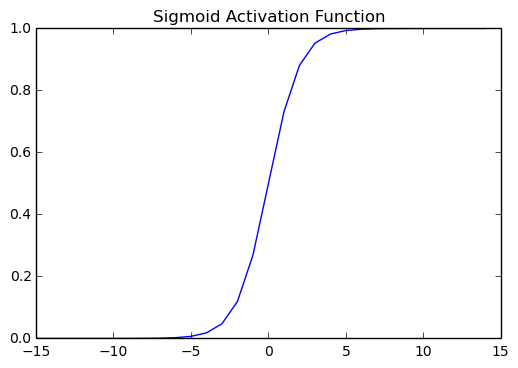

In [30]:
x = np.arange(-15,15)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Activation Function')
plt.show()

In [4]:
# get derivative of weights on layers
# with respect to activation function
def derivative(x):
    return x * (1-x)

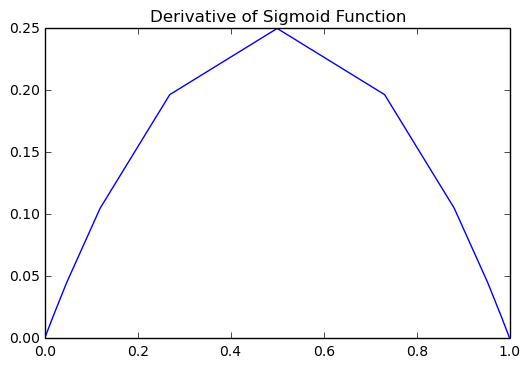

In [31]:
plt.plot(sigmoid(x), derivative(sigmoid(x)))
plt.title('Derivative of Sigmoid Function')
plt.show()

In [23]:
# define input and output
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

# initialize weights for each layer
weight_0 = np.random.random((2,4)) # map input layer
weight_1 = np.random.random((4,1)) # map output layer

# store loss over time in arrays
plot_x = []
plot_y = []

### Neural Network Neuron Feed Forward

$$ y = Wx + b $$

## Assembling the Network and Training

In [24]:
# this network will train on 100,000 training steps
for i in range(0,100000):
    # input layer
    layer_0 = X
    layer_1 = sigmoid(np.dot(layer_0, weight_0))
    layer_2 = sigmoid(np.dot(layer_1, weight_1))
    
    # calculating loss on final layer(layer 2)
    layer_2_loss = Y - layer_2
    plot_x.append(i)
    plot_y.append(np.mean(np.abs(layer_2_loss)))
    
    # back propogate through the loss
    d_layer_2 = layer_2_loss * derivative(layer_2)
    # get loss of first layer
    layer_1_loss  = np.dot(d_layer_2, weight_1.T)
    d_layer_1 = layer_1_loss * derivative(layer_1)
    
    # only print loss every 10,000 steps
    if(i % 10000) == 0:
        print 'Loss: ' + str(np.mean(np.abs(layer_2_loss)))
    weight_1 += np.dot(layer_1.T, d_layer_2)
    weight_0 += np.dot(layer_0.T, d_layer_1)

Loss: 0.498167076199
Loss: 0.018665682483
Loss: 0.0129362867123
Loss: 0.0104826648848
Loss: 0.00904049652789
Loss: 0.00806430797282
Loss: 0.00734763916927
Loss: 0.00679285410306
Loss: 0.00634701966476
Loss: 0.00597862967454


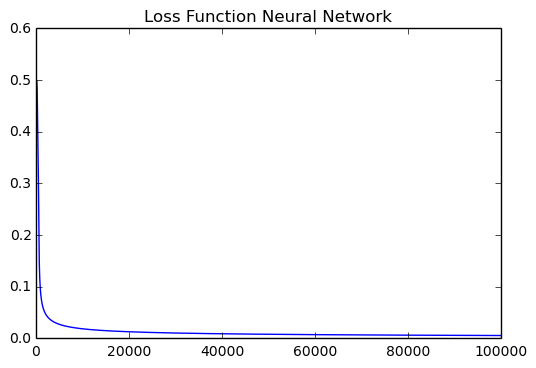

In [28]:
# plot loss function
plt.plot(plot_x,plot_y)
plt.title('Loss Function Neural Network')
plt.show()